# Regression Pipeline with Scikit-learn

In [3]:
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')

Pycaret version: 3.0.0
Python version: 3.9.16


In [4]:
# load sample dataset
import pandas as pd
import seaborn as sns

#from ydata_profiling import ProfileReport

data = pd.read_csv('./Data/cars_transformed.csv')
print(data.shape)
data

(14770, 24)


,ID,Name,Brand,Year,Kilometers,Type,Gearbox_Automatic,Gearbox_Manual,Gearbox_AWD,Gearbox_Front,...,Fuel_Premium Unleaded/Electric,Fuel_Unleaded Petrol/Electric,Fuel_Diesel/Electric,Status_ Used,Status_ New In Stock,Status_ Demo,CC,Color,Seating Capacity,Price
0,12848010.0,29783.375000,26714.574374,2017.0,87354.0,32931.003906,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2497.0,34093.471825,3.0,35990
1,12702597.0,32770.411549,36329.786361,2014.0,66722.0,21298.378090,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1497.0,30133.270718,5.0,21990
2,12833936.0,15226.500000,26103.729730,2012.0,91549.0,35265.625079,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1997.0,34378.837585,5.0,16990
3,12843463.0,32770.411549,34578.291411,2017.0,114731.0,35262.905688,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1968.0,29073.468750,5.0,29850
4,12842119.0,28990.000000,26727.829161,2015.0,86098.0,35263.510467,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2199.0,34095.898355,7.0,26990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14765,12763166.0,32770.411549,23195.900862,2009.0,165000.0,25097.910752,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1796.0,29088.019531,5.0,7500
14766,12748326.0,32770.411549,36337.474955,1996.0,394530.0,35267.261789,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3378.0,29332.304348,8.0,9250
14767,12739224.0,32770.411549,34604.268405,2008.0,148047.0,35266.487207,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1968.0,30145.808011,5.0,12913
14768,12784984.0,32770.411549,23109.275862,2017.0,30707.0,25041.418833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,6200.0,30042.251381,5.0,87888


In [5]:
#data.info()
data_unseen = data.sample(frac=0.1)
data = data.drop(data_unseen.index)
print(f'Data for model: {data.shape}, \nData for unseen predicitions: {data_unseen.shape}')
data_unseen.to_csv('./Data/cars_unseenB.csv', index=False)

Data for model: (13293, 24), 
Data for unseen predicitions: (1477, 24)


In [6]:
X = data.drop(['Price'], axis= 1)
y = data['Price']

In [8]:
%%time


from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)


models = [
            ExtraTreesRegressor(n_jobs=-1, random_state=42),
    
            GradientBoostingRegressor(random_state=42)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print(f"{estimator.__class__.__name__}:\n R_sq: {r2_score(expected, predicted):.4}\n"
          f" MAE: {mean_absolute_error(expected, predicted):,.2f}\n"
         )

for model in models:
    score_model(X, y, model)

ExtraTreesRegressor:
 R_sq: 1.0
 MAE: 0.00

GradientBoostingRegressor:
 R_sq: 0.6881
 MAE: 7,963.45

Wall time: 2min 40s


### Plot Model

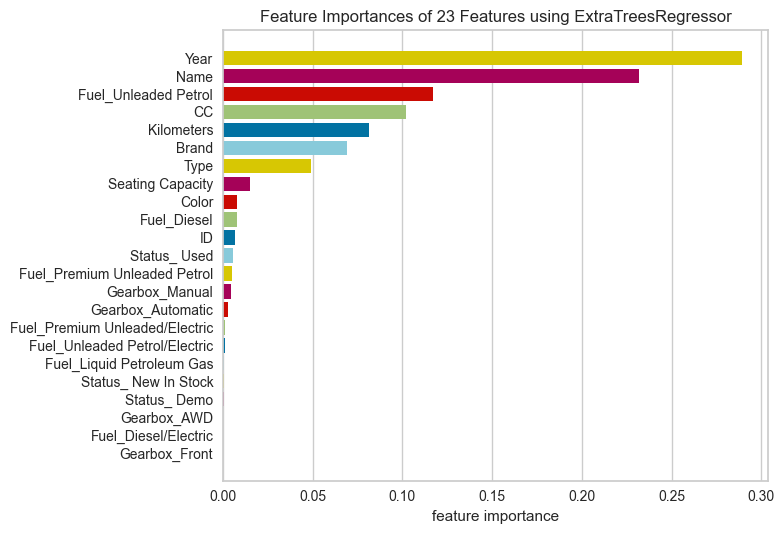

In [9]:
model= ExtraTreesRegressor(n_jobs=-1, random_state=42)

from yellowbrick.model_selection import feature_importances
feature_importances(model, X, y, relative=False);

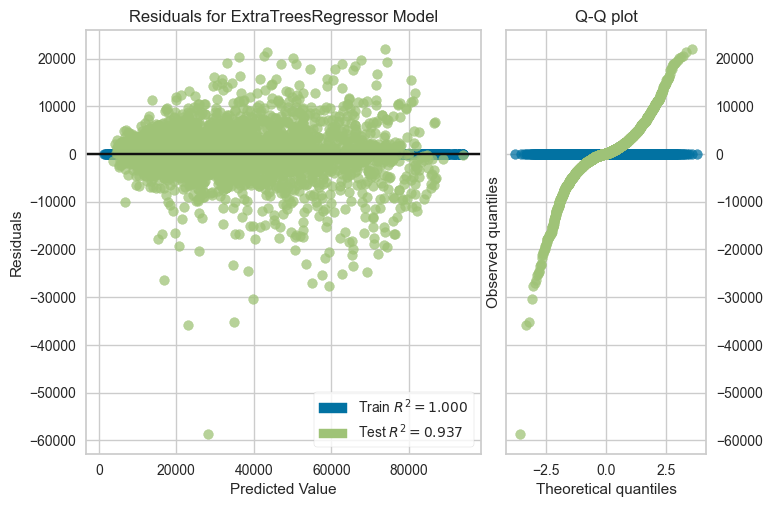

In [10]:
model= ExtraTreesRegressor(n_jobs=-1, random_state=42)

from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, hist=False, qqplot=True)

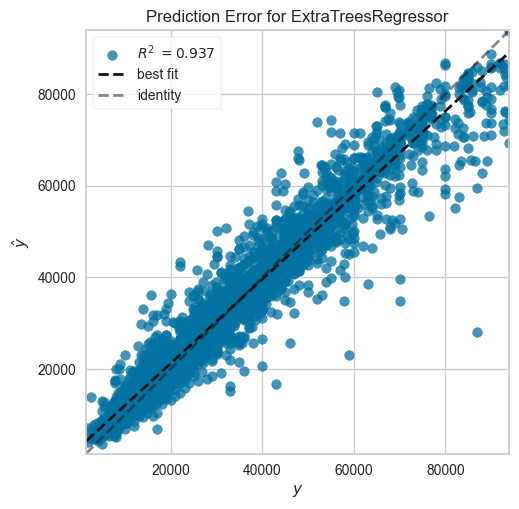

In [11]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

### Predict Model

In [12]:
data_unseen = pd.read_csv('./Data/cars_unseenB.csv')
#data_predunseen = data_unseen.drop(['Price'])
data_to_pred = data_unseen.drop(['Price'], axis= 1)

In [13]:
pred = model.predict(X=data_to_pred)
pred

array([21385.22, 11834.78, 22345.55, ..., 23460.86, 33360.84, 20135.27])

In [14]:
pred_results = data_unseen.loc[:,['Price']]
pred_results['y_pred'] = pred
pred_results['Percent Diff'] = (pred_results['Price']-pred_results['y_pred'])/pred_results['Price']
pred_results

,Price,y_pred,Percent Diff
0,19800,21385.22,-0.080062
1,7800,11834.78,-0.517279
2,22000,22345.55,-0.015707
3,14999,14583.34,0.027713
4,15900,15759.73,0.008822
...,...,...,...
1472,18990,18408.74,0.030609
1473,19990,16775.75,0.160793
1474,24888,23460.86,0.057342
1475,35990,33360.84,0.073053


In [15]:
pred_results.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1477.0,32243.201083,18357.685137,1000.00000,17990.000000,29950.000000,42990.000000,93855.000000
y_pred,1477.0,32428.135518,17542.740999,4504.40000,18735.180000,29732.610000,43013.250000,88942.660000
Percent Diff,1477.0,-0.053446,0.263937,-4.19687,-0.084301,-0.004622,0.042338,0.572202


### Save Model